In [28]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [29]:
# fig, ax = plt.subplots(1, 2)
# jobt = df["job_title_short"].value_counts(ascending=False).head(5)
# sched = df["job_schedule_type"].value_counts(ascending=False).head(5)
# jobt.plot(kind="bar", ax=ax[0])
# sched.plot(kind="bar", ax=ax[1])
# ax[0].set_title("Top 5 Job Titles")
# ax[0].set_ylabel("Count")
# ax[0].set_xlabel("Job Title")
# ax[1].set_title("Job Schedule Distribution")
# ax[1].set_ylabel("Count")
# ax[1].set_xlabel("Job Schedule Type")
# fig.tight_layout()
# plt.show()

In [47]:
# fig, ax = plt.subplots(1, 2)

# df["job_country"].value_counts().sort_values(ascending=False).head(5).plot(kind="bar", ax=ax[0])
# df["job_work_from_home"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax[1])
# ax[0].set_title("Top 5 Countries for Data Employment")
# ax[0].set_ylabel("Number of Jobs")
# ax[0].set_xlabel("Job Country")
# ax[1].set_title("Employees that Work From Home")
# ax[1].set_ylabel("Worker Number")
# ax[1].set_xlabel("Proportion that Work From Home")
# ax[1].set_xticklabels(["Non-Remote", "Remote"], rotation = 0)

# fig.tight_layout()
# plt.show()

In [63]:
sched_count = df.groupby(["job_schedule_type", "job_title_short"]).size().copy()
sched_count = sched_count.reset_index(name= "job_count")
sched_count = sched_count.sort_values(by="job_count", ascending=False)
sched_count

,job_schedule_type,job_title_short,job_count
38,Full-time,Data Analyst,168975
39,Full-time,Data Engineer,165225
40,Full-time,Data Scientist,153278
36,Full-time,Business Analyst,44106
45,Full-time,Software Engineer,42314
...,...,...,...
185,Part-time and Contractor,Senior Data Scientist,1
183,Part-time and Contractor,Senior Data Analyst,1
182,Part-time and Contractor,Machine Learning Engineer,1
101,"Full-time, Contractor, and Temp work",Cloud Engineer,1


In [98]:


# schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

# fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# for i, schedule in enumerate(schedules):
#     sched_plot = sched_count[sched_count["job_schedule_type"] == schedule].head(5)
#     sched_plot.plot(kind="barh", x = "job_title_short", y = "job_count", ax=ax.flatten()[i], title=schedule)
#     ax.flatten()[i].set_ylabel("Job Title")
#     ax.flatten()[i].set_xlabel("Job No.")
#     ax.flatten()[1].set_xlim(0, 12_000)
#     ax.flatten()[2].set_xlim(0, 12_000)
#     ax.flatten()[3].set_xlim(0, 12_000)
#     ax.flatten()[0].set_xticks([40_000, 80_000, 120_000, 160_000, 200_000])
#     ax.flatten()[i].legend().set_visible(False)
#     ax.flatten()[i].invert_yaxis()

# fig.suptitle("Most Found Data Jobs for Schedule Type", fontsize=20)
# fig.tight_layout()
# plt.show()

In [105]:
df1 = df.copy()
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
     
df1_e = df1.explode("job_skills")
df1_e = df1_e.groupby(["job_title_short", "job_skills"]).size()
df1_e = df1_e.reset_index(name="skill_count").sort_values(by="skill_count", ascending=False)
df1_e

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


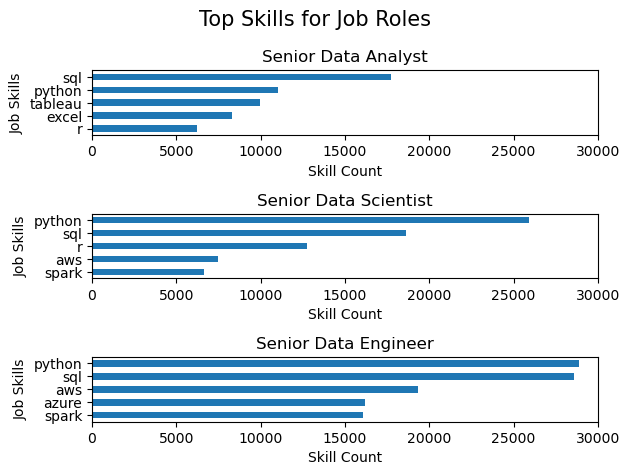

In [114]:
fig, ax = plt.subplots(3, 1)

for i, job_role in enumerate(job_roles):
    sched = df1_e[df1_e["job_title_short"] == job_role].head(5)
    sched.plot(kind="barh", x = "job_skills", y = "skill_count", ax=ax[i], title=job_role)
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,30_000)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel("Job Skills")
    ax[i].set_xlabel("Skill Count")

fig.suptitle("Top Skills for Job Roles", fontsize = 15)    
fig.tight_layout()
plt.show()